<a href="https://colab.research.google.com/github/michael-sam/data_analytics/blob/main/eda/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualisation

Created this notebook that used pretty neat techniques for visualizing data.

## Setup and dataset

In [ ]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('dataset/Superstore_sales.csv')

# Data cleaning

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format

In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [ ]:
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

**checking if there is any null data or not**

In [ ]:
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


<b>To handle the null values in postal code. We will not drop them, instead we will add the postal code of respective city.<br>
1. we need to find the cities for which the postal code is not mentioned. 
2. Fill the postal code of the respective city into the postal code column.</b>

In [ ]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


**We can see that the postal code is not mentioned only for Burlington city in Vermont state. So, we need to fill the postal code of that city.**

In [ ]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Postal code for Burlington city

In [ ]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


# Most Valuable customers

The Most Valuable Customers buy more or higher-value products than the average. customer

In [ ]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the Customers as per the sales
Top_customers = Top_customers[["Sales"]].astype(int) # Cast Sales Value as integers
Top_customers.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the customer name into dataframe 

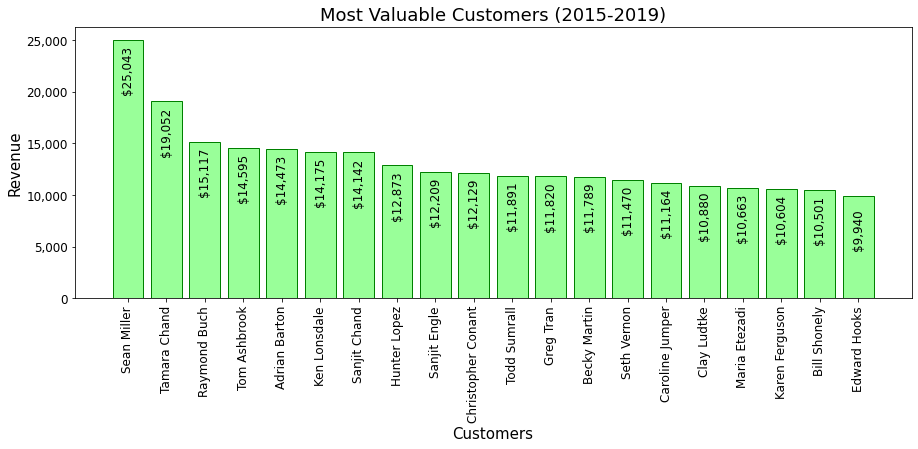

In [ ]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # formatting yticks to thousands separated with commas

for k,v in Top_customers["Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-5000,'$'+ '{:,}'.format(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

# Revenue by states

Top 10 States which generated the highest revenue.

In [ ]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_states = Top_states[["Sales"]].astype(int) # Cast Sales Value as integers
Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe

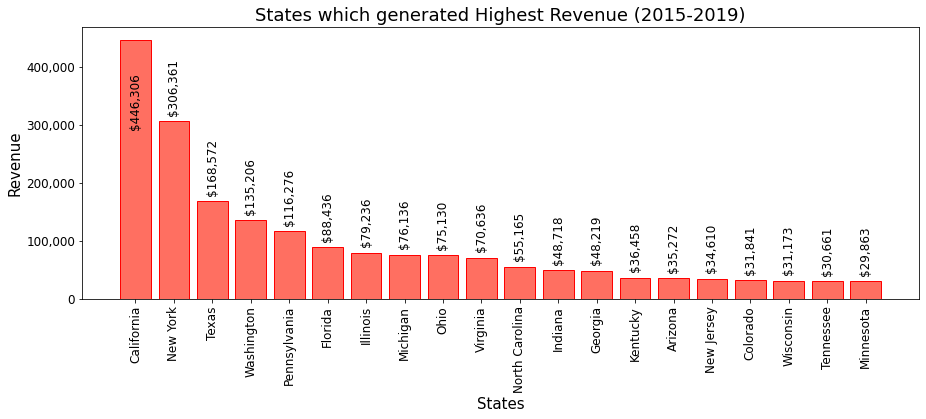

In [ ]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the States
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # formatting yticks to thousands separated with commas

for k,v in Top_states["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ '{:,}'.format(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ '{:,}'.format(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

# Revenue by cities

Top 10 cities which generated the highest revenue.

In [ ]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_cities = Top_cities[["Sales"]].astype(int) # Cast Sales Value as integers
Top_cities.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the cities into the dataframe

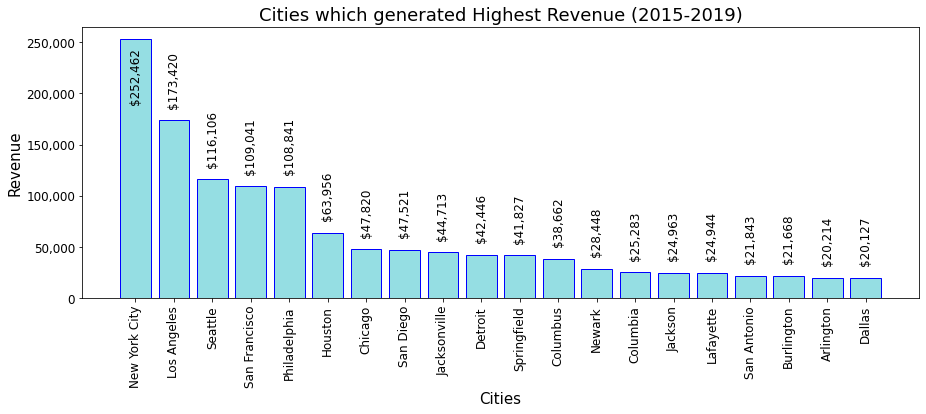

In [ ]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)
plt.bar(Top_cities["City"], Top_cities["Sales"],color= '#95DEE3',edgecolor='blue', linewidth = 1)
plt.xlabel("Cities",fontsize=15)  # x axis shows the States
plt.ylabel("Revenue",fontsize=15)  # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # formatting yticks to thousands separated with commas

for k,v in Top_cities["Sales"].items(): #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-60000,'$'+ '{:,}'.format(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ '{:,}'.format(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

# Revenue by categories

In [ ]:
Top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)  # Sort the Categories as per the sales
Top_category = Top_category[["Sales"]] # keep only the sales column in the dataframe
total_revenue_category = Top_category["Sales"].sum() # To find the total revenue generated as per category
total_revenue_category = '{:,}'.format(int(total_revenue_category)) # Convert the total_revenue_category from float to int and then to string
total_revenue_category = '$' + total_revenue_category # Adding '$' sign before the Value
Top_category.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

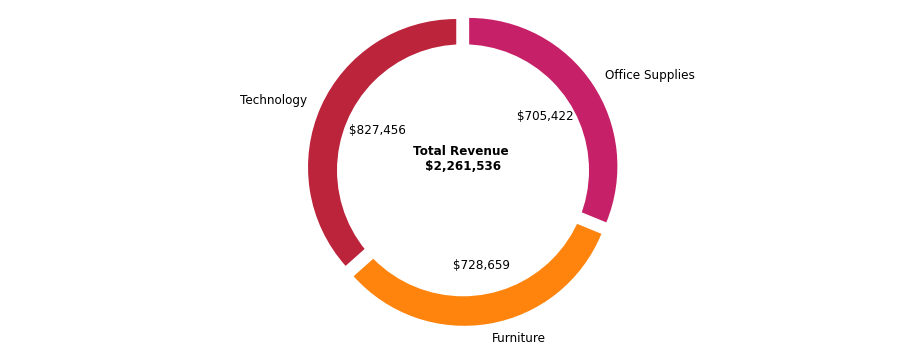

In [ ]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:,}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'black', fontweight = 'bold', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

<i><b>Category - Technology</b></i> generated the highest revenue of about <b>$827,426</b><br>

<b>Total Revenue</b> generated by all the categories - <b>$2,261,536</b>

# Revenue by products

In [ ]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8) # Sort the product names as per the sales
Top_products = Top_products[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the product names into the dataframe
total_revenue_products = Top_products["Sales"].sum() # To find the total revenue generated by all the top products
total_revenue_products = '{:,}'.format(int(total_revenue_products)) # Convert the total_revenue_products from float to int and then to string
total_revenue_products = '$' + total_revenue_products # Adding '$' sign before the Value

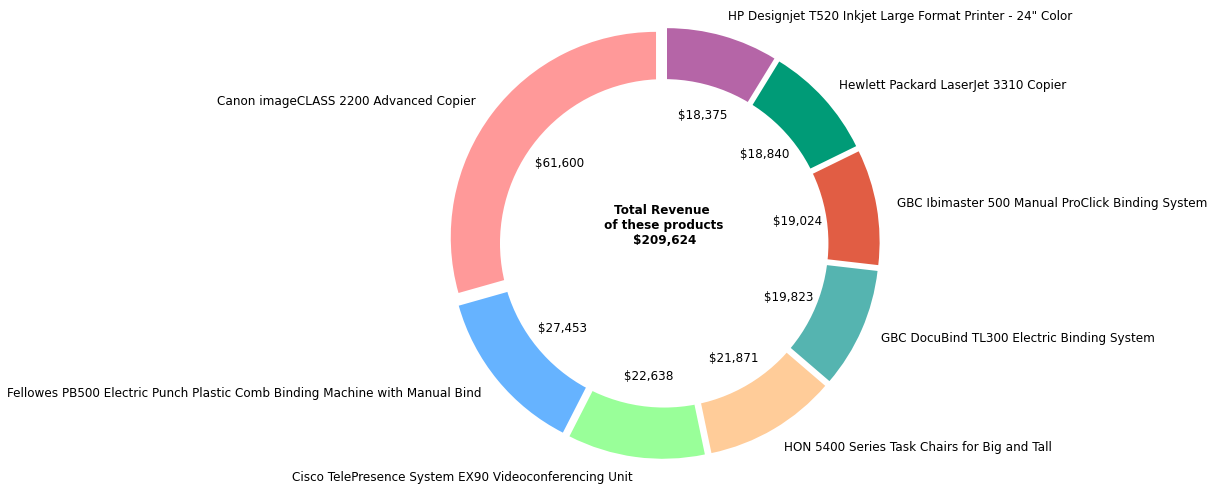

In [ ]:
plt.rcParams["figure.figsize"] = (13,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined for the figure
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7'] # colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'], autopct= autopct_format(Top_products['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.80,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
label = ax1.annotate('Total Revenue \n of these products \n'+str(total_revenue_products),color = 'black',fontweight = 'bold', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

We can see that <i><b>Product - Canon imageCLASS 2200 Advanced Copier</b></i> generated the highest revenue of about <b>$61,600</b><br>

<b>Total Revenue</b> generated by all these products - <b>$209,624</b>

# Revenue by sub-categories

In [ ]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index

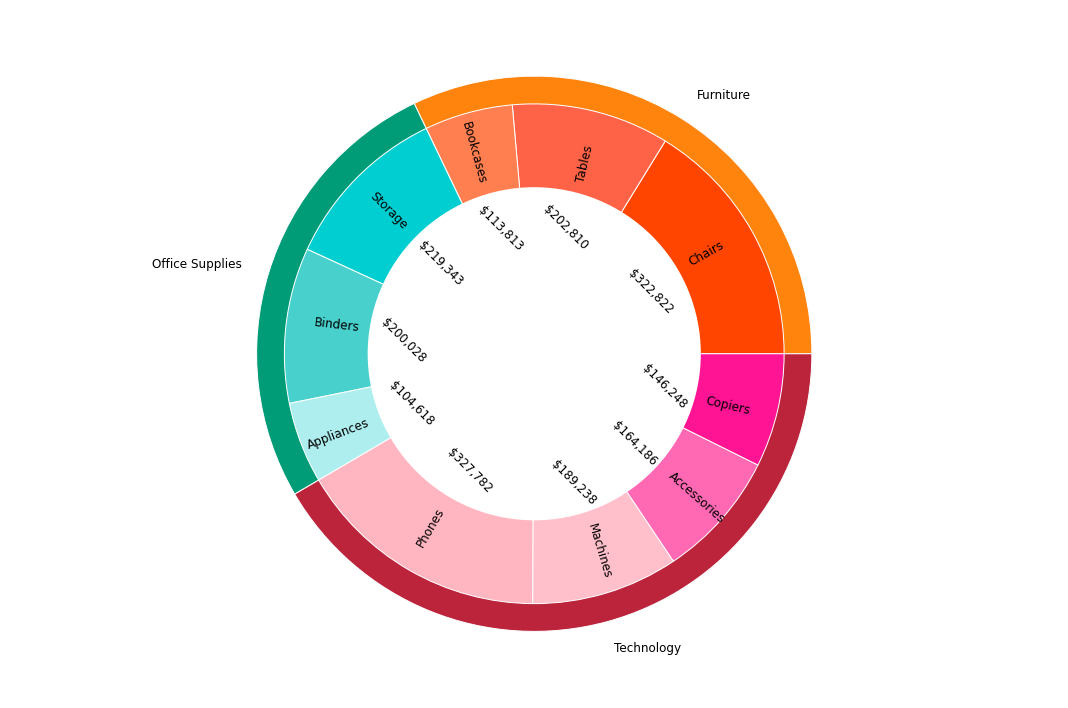

In [ ]:
plt.rcParams["figure.figsize"] = (15,10) # width and height of figure is defined in inches
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<i><b>Sub-Category - Phones</b></i> generated the highest revenue of about <b>$327,782</b><br>

# Revenue by segments

In [ ]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) # Sort the segment as per the sales
Top_segment = Top_segment[["Sales"]] # keep only the sales column in the dataframe
Top_segment.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the segment column into the data frame
total_revenue_segement = Top_segment["Sales"].sum() # To find the total revenue generated as per segment
total_revenue_segement = '{:,}'.format(int(total_revenue_segement))  # Convert the total_revenue_segment from float to int and then to string
total_revenue_segement= '$' + total_revenue_segement # Adding '$' sign before the Value

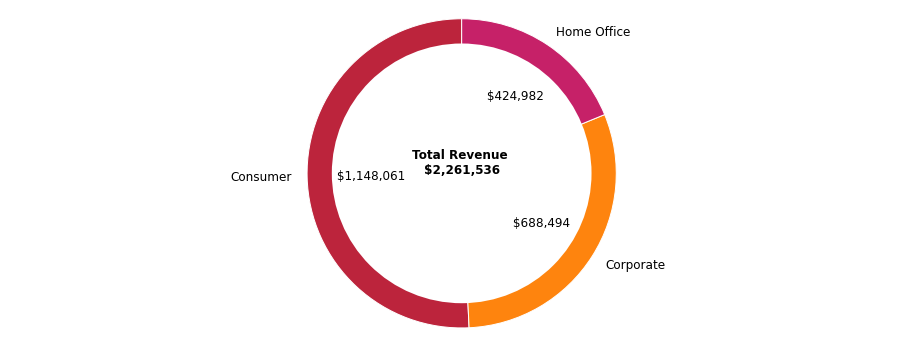

In [ ]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.06,0.02,0.02)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Sales'], colors = colors, labels=Top_segment['Segment'], autopct= autopct_format(Top_segment['Sales']),startangle=90, wedgeprops=dict(edgecolor='w'))
centre_circle = plt.Circle((0,0),0.84,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = 'black', fontweight = 'bold', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

<i><b>Segment - Consumer</b></i> generated the highest revenue of about <b>$1,148,061</b><br>

<b>Total Revenue</b> generated by all the segments - <b>$2,261,536</b>

# Revenue by regions


In [ ]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_region.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Region column into the data frame

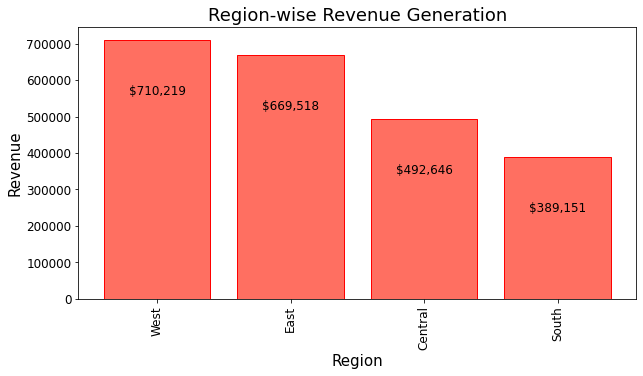

In [ ]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Region-wise Revenue Generation", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Region",fontsize=15) # x axis shows the Region 
plt.ylabel("Revenue",fontsize=15) # y axis show the Revenue generated
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items(): #To show the exact revenue generated on the figure
        plt.text(k,v-150000,'$'+ '{:,}'.format(v), fontsize=12,color='k', horizontalalignment='center');

<h3>Which shipping mode has the highest sales?</h3>

In [ ]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) # Sort the Shipping modes as per the sales
Top_shipping = Top_shipping[["Sales"]] # keep only the sales column in the dataframe
Top_shipping.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
total_revenue_ship = Top_segment["Sales"].sum() # To find the total revenue generated as per shipping mode
total_revenue_ship = '{:,}'.format(int(total_revenue_ship)) # Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = '$' + total_revenue_ship # Adding '$' sign before the Value

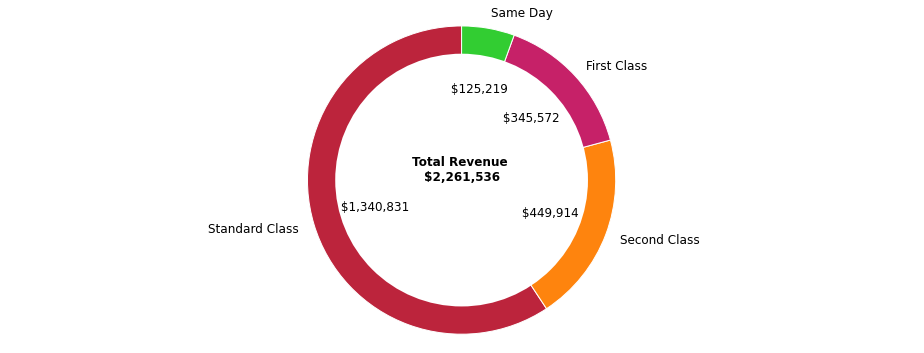

In [ ]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168',"limegreen"] # define colors for the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors = colors, labels=Top_shipping['Ship Mode'], autopct= autopct_format(Top_shipping['Sales']), startangle=90, wedgeprops=dict(edgecolor='w'))
centre_circle = plt.Circle((0,0),0.82,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_ship),color = 'black', fontweight='bold', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

<i><b>Shipping mode - Standard Class</b></i> generated the highest revenue of about <b>$1,340,831</b><br>

<b>Total Revenue</b> generated by all the shipping modes - <b>$2,261,536</b>

# Correlation of Features
Plotting a correlation matrix provides an overview of how the features are related to one another. For a Pandas dataframe, `.corr` provides the Pearson Correlation values of the columns pairwise in that dataframe.

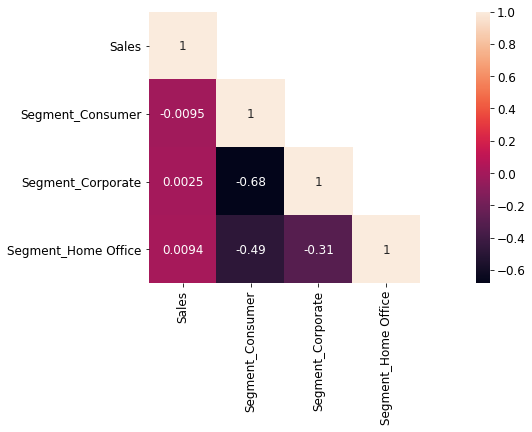

In [ ]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

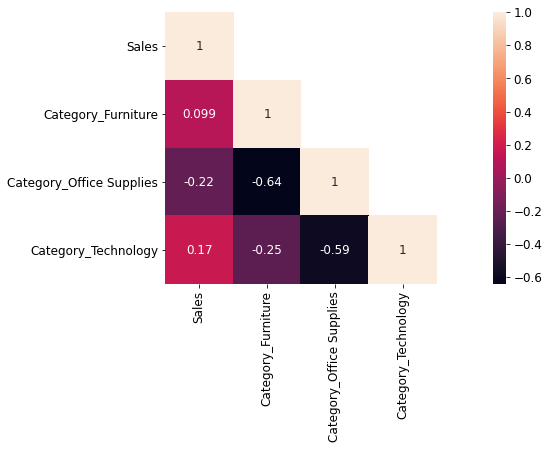

In [ ]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

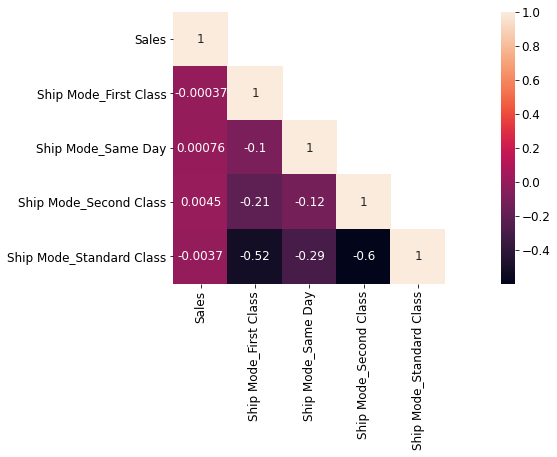

In [ ]:
df1 = df[['Ship Mode','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

# Choropleth map

Since the state abbreviation or the latitude and longitude are not given, it is difficult to plot a map. The state abbreviations are added to the respective states and a choropleth map is plotted.

In [ ]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [ ]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal Code',1, inplace = True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, plot_mpl

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limit map scope to USA
)

fig.show();

Reference: Majority of codes are customized from [Rohit Sahoo, 
EDA Superstore Dataset](https://www.kaggle.com/rohitsahoo/eda-superstore-dataset/data#notebook-container)